In [1]:
# This handy piece of code changes Jupyter Notebooks margins to fit your screen.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Scrape Reddit Comments for a Sentiment Analysis - Walkthough
### This tutorial was adapted from a number of sources including: http://www.storybench.org/how-to-scrape-reddit-with-python/ and https://towardsdatascience.com/scraping-reddit-data-1c0af3040768

In [2]:
# Import all the necessary libraries
import praw  # Import the Praw library: https://praw.readthedocs.io/en/latest/code_overview/reddit_instance.html
import pandas as pd  # Import Pandas library: https://pandas.pydata.org/
import datetime as dt  # Import datetime library
import matplotlib.pyplot as plt  # Import Matplot lib for plotting

In [3]:
import credentials

In [4]:
# Praw (Python Reddit API Wrapper) is used to communicate with Reddit
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

Version 7.0.0 of praw is outdated. Version 7.1.0 was released Tuesday June 23, 2020.


### We will begin viewing the top 100 posts from the 'front page' of '/r/all' within the last month.  

In [5]:
subreddit = reddit.subreddit('all').top('month', limit=100)  # Define the subreddit of interest. Here we are taking the top 100 posts under 'All' from the past month

In [6]:
# Lets print the submission title and score:
for submission in subreddit:
    print(submission.title, submission.score)

Leaked Drone footage of shackled and blindfolded Uighur Muslims led from trains. As a German this is especially chilling. 242954
Meet the newest member of the family, Dutch! 220280
Prince Andrew says he's never met Virginia Giuffre, so here's them together with Ghislaine Maxwell 203171
Just increased my car’s value by 1 billion dollars 197266
Sheep in Human Clothing 189032
I got my mask in the mail. Maybe I should've gone with a better quality... 174112
Always has been 173998
please hold me 171047
Dad took me to a racetrack 7 years ago. Met Paul Walker, he stuck his finger up my nose. 170889
Brain.exe has commit DIE 168478
Licensed Dad Joke 165404
Father is a acrobat. His daughter inherited all his talent genes. 165207
Following your passion is hard in Asia 165190
It’s the little things 164711
please enjoy 165042
Person has balls, every other neighbor has Trump signs up 165070
Years ago I posted a pic of my Dad and I, people said we resembled Lee and Clem so we cosplayed them 164118
Th

### Kind of hard to read.  Lets add some more information and clean it up a bit.

In [13]:
# Define the subreddit of interest. Here we are taking the top 100 posts under 'All' from the past month
subreddit = reddit.subreddit('all').top('month', limit = 100)

In [14]:
# First, we will create a dictionary for a Pandas table.
topics_dict = []  # Ceate and empty dictionary
topics_dict = { "title":[],
                "score":[], 
                "id":[], "url":[], 
                "comms_num": [],
                "created": [],
                "body":[]}

In [15]:
# add elements of each comment to our dictionary
for comment in list(subreddit):
    topics_dict["title"].append(comment.title)
    topics_dict["score"].append(comment.score)
    topics_dict["id"].append(comment.id)
    topics_dict["url"].append(comment.url)
    topics_dict["comms_num"].append(comment.num_comments)
    topics_dict["created"].append(comment.created)
    topics_dict["body"].append(comment.selftext)

In [16]:
topics_dict

{'title': ['Leaked Drone footage of shackled and blindfolded Uighur Muslims led from trains. As a German this is especially chilling.',
  'Meet the newest member of the family, Dutch!',
  "Prince Andrew says he's never met Virginia Giuffre, so here's them together with Ghislaine Maxwell",
  'Just increased my car’s value by 1 billion dollars',
  'Sheep in Human Clothing',
  "I got my mask in the mail. Maybe I should've gone with a better quality...",
  'Always has been',
  'please hold me',
  'Dad took me to a racetrack 7 years ago. Met Paul Walker, he stuck his finger up my nose.',
  'Brain.exe has commit DIE',
  'Licensed Dad Joke',
  'Father is a acrobat. His daughter inherited all his talent genes.',
  'Following your passion is hard in Asia',
  'It’s the little things',
  'please enjoy',
  'Person has balls, every other neighbor has Trump signs up',
  'Years ago I posted a pic of my Dad and I, people said we resembled Lee and Clem so we cosplayed them',
  'The solution is obvious,

In [17]:
# Convert the dictionary to a pandas data frame.
topics_data = pd.DataFrame(data=topics_dict)
topics_data  # Show the data frame

,title,score,id,url,comms_num,created,body
0,Leaked Drone footage of shackled and blindfold...,242954,hrpgzt,https://gfycat.com/welldocumentedgrizzledafric...,12347,1.594855e+09,
1,"Meet the newest member of the family, Dutch!",220280,hzkbop,https://i.redd.it/fj8vqooc8nd51.jpg,3167,1.595991e+09,
2,Prince Andrew says he's never met Virginia Giu...,203182,hpj55g,https://i.redd.it/gx80hyyu0ba51.jpg,6222,1.594535e+09,
3,Just increased my car’s value by 1 billion dol...,197267,i0wgoo,https://v.redd.it/wa4bmlccu2e51,1443,1.596180e+09,
4,Sheep in Human Clothing,189034,hzd35i,https://i.redd.it/oe1haxez3ld51.png,704,1.595965e+09,
...,...,...,...,...,...,...,...
95,Owls are the cats of the air,127823,hxtf6l,https://gfycat.com/politicaljealousappaloosa,1530,1.595737e+09,
96,I love Arnold's wholesome murders,128148,i1px5a,https://i.redd.it/lxagp7gf8de51.jpg,1852,1.596305e+09,
97,I swear I didn't do that 😠,127801,hu4fbx,https://thumbs.gfycat.com/GentleSoftIndianelep...,779,1.595209e+09,
98,The Quirks and Quarks of Reddit,127529,hwf937,https://i.imgur.com/1bbnWCH.gifv,1940,1.595538e+09,


In [18]:
# The created column is in unix time. Convert it to normal time.
topics_data['created'] = topics_data['created'].astype(int)  # Change the creaded column to an integer.
ts = []  # create an empty list for storing timestamps
for time in topics_data.index:
    ts.append(dt.datetime.fromtimestamp(topics_data['created'][time]))  #  convert unix time to normal time

In [19]:
topics_data.assign(created=ts)  # assign ts to created column

,title,score,id,url,comms_num,created,body
0,Leaked Drone footage of shackled and blindfold...,242954,hrpgzt,https://gfycat.com/welldocumentedgrizzledafric...,12347,2020-07-15 17:19:29,
1,"Meet the newest member of the family, Dutch!",220280,hzkbop,https://i.redd.it/fj8vqooc8nd51.jpg,3167,2020-07-28 20:43:35,
2,Prince Andrew says he's never met Virginia Giu...,203182,hpj55g,https://i.redd.it/gx80hyyu0ba51.jpg,6222,2020-07-12 00:28:17,
3,Just increased my car’s value by 1 billion dol...,197267,i0wgoo,https://v.redd.it/wa4bmlccu2e51,1443,2020-07-31 01:14:12,
4,Sheep in Human Clothing,189034,hzd35i,https://i.redd.it/oe1haxez3ld51.png,704,2020-07-28 13:35:43,
...,...,...,...,...,...,...,...
95,Owls are the cats of the air,127823,hxtf6l,https://gfycat.com/politicaljealousappaloosa,1530,2020-07-25 22:16:01,
96,I love Arnold's wholesome murders,128148,i1px5a,https://i.redd.it/lxagp7gf8de51.jpg,1852,2020-08-01 12:11:13,
97,I swear I didn't do that 😠,127801,hu4fbx,https://thumbs.gfycat.com/GentleSoftIndianelep...,779,2020-07-19 19:37:58,
98,The Quirks and Quarks of Reddit,127529,hwf937,https://i.imgur.com/1bbnWCH.gifv,1940,2020-07-23 15:02:30,


### That's better to look at.  We can cearly see the top 100 posts within the last month from the '/r/all' front page. Now we want to pull the top level comments (first comments) found in the top 100 posts within the last month from the '/r/all' front page.  These top level comments these will be used as our baseline sentiment

In [21]:
from tqdm.notebook import tqdm  # progress bar used in loops

In [25]:
baseline_subreddit = reddit.subreddit('all').top('month', limit = 10)  # Taking the same top 100 posts under 'All' from the past month
comments_all_dict = {"id":[],  # Create the empty dictionary
    "comments":[]}
for post in tqdm(baseline_subreddit, total=10):
    submission = reddit.submission(id = post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments: 
        comments_all_dict["id"].append(top_level_comment.id)  # Saving ID into the dictionary
        comments_all_dict["comments"].append(top_level_comment.body)  # Saving comment into the dictionary

Exception ignored in: <function tqdm.__del__ at 0x00000199DEB9A048>
Traceback (most recent call last):
  File "C:\Users\words\Anaconda3\lib\site-packages\tqdm\std.py", line 1087, in __del__
    self.close()
  File "C:\Users\words\Anaconda3\lib\site-packages\tqdm\notebook.py", line 258, in close
    self.sp(bar_style='success')
AttributeError: 'tqdm_notebook' object has no attribute 'sp'


In [26]:
# View the comments. They should be in a Pandas Data Table
comments_all_dict

{'id': ['fy5lf2s',
  'fy5q2rn',
  'fy5owvu',
  'fy5miks',
  'fy5mrop',
  'fy62s9x',
  'fy5qkwn',
  'fy6r33r',
  'fy5h81d',
  'fy64erc',
  'fy5mp6h',
  'fy5ooom',
  'fy6uvap',
  'fy5uo3m',
  'fy63lm7',
  'fy5rsgt',
  'fy5mnjm',
  'fy5sg1m',
  'fy6lfmx',
  'fy5omrg',
  'fy5zcx2',
  'fy5l7d8',
  'fy65qpz',
  'fy6fpnz',
  'fy6jyww',
  'fy6pcu9',
  'fy67nhl',
  'fy60ser',
  'fy5o3ab',
  'fy6oxf3',
  'fy7u85q',
  'fy5pyi4',
  'fy6anca',
  'fy6igl4',
  'fy6czv8',
  'fy7dcea',
  'fy8kk98',
  'fy64f6r',
  'fy5olse',
  'fy5oqn3',
  'fy6gzov',
  'fy60s5o',
  'fy65ss3',
  'fy6ldt6',
  'fy8kxqe',
  'fy60gqg',
  'fzjfzde',
  'fzjfw2r',
  'fzjhe6i',
  'fzji6pj',
  'fzjml72',
  'fzjg4ey',
  'fzji6zz',
  'fzjgrje',
  'fzji88o',
  'fzjlz67',
  'fzjj413',
  'fzjirl0',
  'fzjfupn',
  'fzjg5kd',
  'fzk40be',
  'fzjnf49',
  'fzk41ti',
  'fzjfp64',
  'fzjkwvh',
  'fzjif88',
  'fzjlq3w',
  'fzjfyh1',
  'fzjhgvc',
  'fzke08i',
  'fzjfx5d',
  'fzjhb56',
  'fzjpaqe',
  'fzk682w',
  'fzk8miz',
  'fzkafly',
  'fzk

In [27]:
# Store comments in the the DataFrame
comments_base_data = pd.DataFrame.from_dict(comments_all_dict, orient='index').T  # Add and transpose them to data table.
comments_base_data

,id,comments
0,fy5lf2s,Can someone explain to me why this is happening?
1,fy5q2rn,The world said never again after the Holocaust...
2,fy5owvu,"This is sickening. Imagine if this was you, or..."
3,fy5miks,[deleted]
4,fy5mrop,That is fucking terrifying
...,...,...
1543,fxjioyr,Sad
1544,fxjirz2,In 20 years you'll fart in front of your lesbi...
1545,fxjj08n,Super sensitive microphone or super loud fart
1546,fxjjcoj,*everyone felt that*


In [28]:
df = pd.DataFrame(data={'comments': comments_all_dict['comments']})

In [29]:
df

,comments
0,Can someone explain to me why this is happening?
1,The world said never again after the Holocaust...
2,"This is sickening. Imagine if this was you, or..."
3,[deleted]
4,That is fucking terrifying
...,...
1543,Sad
1544,In 20 years you'll fart in front of your lesbi...
1545,Super sensitive microphone or super loud fart
1546,*everyone felt that*


In [30]:
# Now we need to prep the comments for a sentment analysis. We tokenize the comments into individual words
for comment in comments_base_data.comments:  # loop over each word
        commentWords = comment.split()  # split comments into individual words
        for word in commentWords:  # loop over idndividual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            print(word)

Can
someone
explain
to
me
why
this
is
happening
The
world
said
never
again
after
the
Holocaust
Well
dozens
of
genocides
later
This
is
sickening
Imagine
if
this
was
you
or
your
child
or
your
family
member
Honest
question
what
can
an
everyday
average
person
do
to
help
[deleted]
That
is
fucking
terrifying
**NEVER
AGAIN**
*unless
they
manufacture
our
goods
cheaply...*
All
with
shaved
heads
Didn't
a
shipment
of
like
13
TONS
of
real
hair
wigs
just
get
shipped
here
from
China
EDIT
[yup](https://www.axios.com/us-china-forced-labor-products-human-hair-69da26c5-2d01-4bad-a2b2-8c944f6d0a70.html
EDIT
2
I
am
absolutely
insinuating
that
China
is
shaving
prisoners
heads
and
selling
the
hair
as
wigs
If
that
doesn't
shock
you
or
you
want
to
point
out
that
tHiS
wAS
9
MoNthS
AgO
perhaps
you'd
be
interested
in
an
[organ
or
two?](https://www.businessinsider.com/china-harvesting-organs-of-uighur-muslims-china-tribunal-tells-un-2019-9
Please
note
this
article
is
8
months
old
EDIT
3
Thank
you
for
the
gold
if


### Now we will use the sentiment file called AFINN-en-165.txt.  This file contains a sentiment score for 3382 words.  More information can be found here: https://github.com/fnielsen/afinn With the sentiment file we will assign scores to words within the top comments that are found in the AFINN file

In [32]:
sentimentfile = open("AFINN-en-165.txt", "r")  # open sentiment file
sentiments = {"-5": 0, "-4": 0, "-3": 0, "-2": 0, "-1": 0, "0": 0, "1": 0, "2": 0, "3": 0, "4": 0, "5": 0}  # Create the sentiment dictionary and populate it with zeros 
scores = {}  # an empty dictionary
for line in sentimentfile:  # loop over each word / sentiment score
    word, score = line.split("\t")  # file is tab-delimited
    scores[word] = int(score)  # convert the scores to intergers

In [36]:
{word: 0 for word, value in scores.items() if value == 0}

{'kind of': 0, 'some kind': 0}

In [33]:
for word in comments_base_data.comments:  # loop over each word
        commentWords = word.split()  # split comments into individual words
        for word in commentWords:  # loop over individual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments[str(score)] += 1  # add one to the sentiment score

In [34]:
# Print the scores
print("-5 sentiments ", sentiments["-5"])
print("-4 sentiments ", sentiments["-4"])
print("-3 sentiments ", sentiments["-3"])
print("-2 sentiments ", sentiments["-2"])
print("-1 sentiments ", sentiments["-1"])
print(" 0 sentiments ", sentiments["0"])
print(" 1 sentiments ", sentiments["1"])
print(" 2 sentiments ", sentiments["2"])
print(" 3 sentiments ", sentiments["3"])
print(" 4 sentiments ", sentiments["4"])
print(" 5 sentiments ", sentiments["5"])

-5 sentiments  4
-4 sentiments  88
-3 sentiments  140
-2 sentiments  211
-1 sentiments  135
 0 sentiments  0
 1 sentiments  229
 2 sentiments  384
 3 sentiments  217
 4 sentiments  84
 5 sentiments  0


In [39]:
sentiments

{'-5': 4,
 '-4': 88,
 '-3': 140,
 '-2': 211,
 '-1': 135,
 '0': 0,
 '1': 229,
 '2': 384,
 '3': 217,
 '4': 84,
 '5': 0}

In [50]:
list(sentiments.values())

[4, 88, 140, 211, 135, 0, 229, 384, 217, 84, 0]

In [37]:
# Now let us put the sentiment scores into a dataframe.
senti_base = pd.DataFrame(sentiments, index=['Count']).T.reset_index()  # Convert the sentiment dictionary to a data frame, transpose the data, and reset the index
senti_base['Value'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5]  # add a score column
senti_base = senti_base[['Value', 'Count']]  # Reorder the columns
senti_base

,Value,Count
0,-5,4
1,-4,88
2,-3,140
3,-2,211
4,-1,135
5,0,0
6,1,229
7,2,384
8,3,217
9,4,84


In [52]:
senti_base = pd.DataFrame(data={'Value': list(sentiments.keys()), 'Count': list(sentiments.values())})
senti_base

,Value,Count
0,-5,4
1,-4,88
2,-3,140
3,-2,211
4,-1,135
5,0,0
6,1,229
7,2,384
8,3,217
9,4,84


### We will plot the data so it is easier to visualize.  

In [54]:
%matplotlib inline

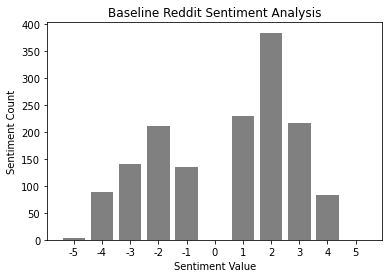

In [56]:
# Plot the data
plt.bar(senti_base['Value'], senti_base['Count'], color = 'grey')  # plot x-values, y-values, color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Sentiment Count')  # add y-label
plt.title('Baseline Reddit Sentiment Analysis')  # add title
plt.show()

### Now that we have baseline comment sentiment data we will build a sentiment file containing sentiment analysis from a specific subreddit.  Below, I picked the /r/aww subreddit, a subreddit for cute and cuddly pictures :-). 

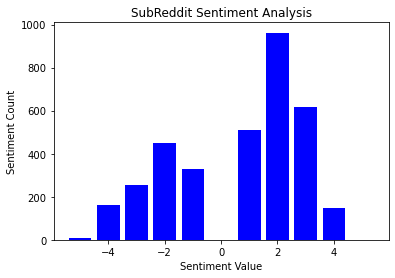

In [57]:
search_subreddit = reddit.subreddit('aww').top('month', limit = 10)  # pick the subreddit you want to select. Do you want to find top posts, or hot posts?, from what time period?, how many posts?
comments_subreddit = {"id": [], "comments": []}  # Create a dictionary for subreddit comments
for post in tqdm(search_subreddit, total=10):
    submission = reddit.submission(id=post)
    submission.comments.replace_more(limit=0)  # This line of code expands the comments if “load more comments” and “continue this thread” links are encountered
    for top_level_comment in submission.comments:
        comments_subreddit["id"].append(top_level_comment.id)  # Saving ID into the dictionary
        comments_subreddit["comments"].append(top_level_comment.body)  # Saving comment into the dictionary
        
comments_subreddit_data = pd.DataFrame.from_dict(comments_subreddit, orient='index').T # Create a dataframe for the subreddit comments

sentimentfile = open("AFINN-en-165.txt", "r")  # open sentiment file
scores = {}  # an empty dictionary
for line in sentimentfile:  # loop over each word / sentiment score
    word, score = line.split("\t")  # file is tab-delimited
    scores[word] = int(score)  # convert the scores to intergers
    
for word in comments_subreddit_data.comments:  # loop over each word in dataframe
         commentWords = word.split()  # split comments into individual words
         for word in commentWords:  # loop over idndividual words in each comment
            word = word.strip('?:!.,;"!@()#-')  # remove extraneous characters
            word = word.replace("\n", "")  # remove end of line
            if word in scores.keys():  # check if word is in sentiment dictionary
                score = scores[word]  # check if word is in sentiment dictionary
                sentiments[str(score)] += 1  # add one to the score if 

subreddit_senti = []
subreddit_senti = pd.DataFrame(sentiments, index=['Count']).T.reset_index()  # Convert the sentiment dictionary to a data frame, transpose the data, and reset the index
subreddit_senti['Value'] = [-5,-4,-3,-2,-1,0,1,2,3,4,5]  # add a score column
subreddit_senti = subreddit_senti[['Value', 'Count']]  # Reorder the columns

plt.bar(subreddit_senti['Value'], subreddit_senti['Count'], color='blue')  # plot the data x-values, y-values, color
plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Sentiment Count')  # add y-label
plt.title('SubReddit Sentiment Analysis')  # add title
plt.show()

### Now we will overlay the baseline comment sentiment and the subreddit comment sentiment to help compare.

In [62]:
senti_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Value   11 non-null     object
 1   Count   11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


In [63]:
subreddit_senti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   11 non-null     int64
 1   Count   11 non-null     int64
dtypes: int64(2)
memory usage: 304.0 bytes


In [64]:
senti_base['Value'] = senti_base['Value'].astype('int')

In [65]:
senti_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Value   11 non-null     int32
 1   Count   11 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 260.0 bytes


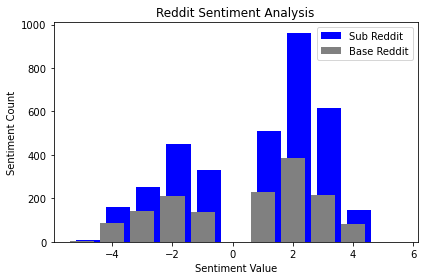

In [66]:
# Plot the data together
plt.bar(subreddit_senti['Value'] + 0.2,subreddit_senti['Count'], color='blue', label='Sub Reddit') # add subreddit data

plt.bar(senti_base['Value'], senti_base['Count'], color='grey', label='Base Reddit') # add baseline data
plt.legend() # add the legend

plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Sentiment Count')  # add y-label
plt.title('Reddit Sentiment Analysis')  # add title
plt.tight_layout()  # tight layout makes it look nice
plt.show()  # show the plot

## Is this an accurate representation of the data?  What are we missing?  

## Let us normalize the data and replot.

In [67]:
# First we will add normalized count and normalized scores to the senti_base dataframe.
senti_base['Normalized']=senti_base['Count'] / senti_base['Count'].sum()  # Normalize the Count
senti_base

,Value,Count,Normalized
0,-5,4,0.002681
1,-4,88,0.058981
2,-3,140,0.093834
3,-2,211,0.141421
4,-1,135,0.090483
5,0,0,0.000000
6,1,229,0.153485
7,2,384,0.257373
8,3,217,0.145442
9,4,84,0.056300


In [68]:
# Now we will add normalized count and normalized scores to the subreddit_senti dataframe.
subreddit_senti['Normalized'] = subreddit_senti['Count'] / subreddit_senti['Count'].sum()  # Normalize the Count
subreddit_senti

,Value,Count,Normalized
0,-5,8,0.002330
1,-4,160,0.046593
2,-3,253,0.073675
3,-2,448,0.130460
4,-1,331,0.096389
5,0,0,0.000000
6,1,510,0.148515
7,2,962,0.280140
8,3,615,0.179091
9,4,146,0.042516


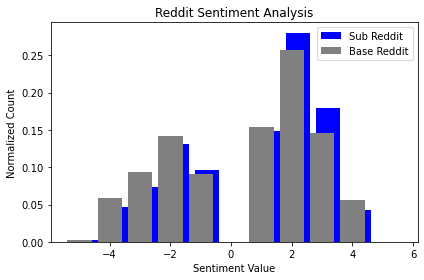

In [69]:
# Plot the normalized data together
plt.bar(subreddit_senti['Value'] + 0.2 ,subreddit_senti['Normalized'], color='b', label = 'Sub Reddit')  # add subreddit data

plt.bar(senti_base['Value'], senti_base['Normalized'], color='grey', label = 'Base Reddit')  # add baseline data
plt.legend()  # add the legend

plt.xlabel('Sentiment Value')  # add x-label
plt.ylabel('Normalized Count')  # add y-label
plt.title('Reddit Sentiment Analysis')  # add title
plt.tight_layout()  # tight layout makes it look nice
plt.show()  # show the plot